## Apple Health Processor

-----

## Dependencies and Libraries

In [1]:
from datetime import date, datetime, timedelta as td
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

------

## Functions for Processing Dates and Timezones

In [2]:
# functions to convert UTC to Shanghai time zone and extract date/time elements
convert_tz = lambda x: x.to_pydatetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('Asia/Shanghai'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_date = lambda x: '{}-{:02}-{:02}'.format(convert_tz(x).year, convert_tz(x).month, convert_tz(x).day) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_minute = lambda x: convert_tz(x).minute
get_day_of_week = lambda x: convert_tz(x).weekday()

---

## Steps

In [3]:
steps = pd.read_csv("data/apple_health_export/StepCount.csv")

In [4]:
steps.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
287791,David’s Apple Watch,8.4.2,"<<HKDevice: 0x283e9a580>, name:Apple Watch, ma...",StepCount,count,2022-04-03 10:17:12 -0400,2022-04-03 10:12:14 -0400,2022-04-03 10:12:24 -0400,14
287792,David’s Apple Watch,8.4.2,"<<HKDevice: 0x283e9a580>, name:Apple Watch, ma...",StepCount,count,2022-04-03 10:17:12 -0400,2022-04-03 10:13:58 -0400,2022-04-03 10:14:54 -0400,43
287793,David’s Apple Watch,8.4.2,"<<HKDevice: 0x283e9a580>, name:Apple Watch, ma...",StepCount,count,2022-04-03 10:17:12 -0400,2022-04-03 10:15:20 -0400,2022-04-03 10:15:35 -0400,12
287794,David’s Apple Watch,8.4.2,"<<HKDevice: 0x283e9a580>, name:Apple Watch, ma...",StepCount,count,2022-04-03 11:08:58 -0400,2022-04-03 10:57:51 -0400,2022-04-03 10:59:00 -0400,50
287795,David’s Apple Watch,8.4.2,"<<HKDevice: 0x283e9a580>, name:Apple Watch, ma...",StepCount,count,2022-04-03 11:28:15 -0400,2022-04-03 11:17:18 -0400,2022-04-03 11:18:11 -0400,69


In [5]:
# parse out date and time elements as Shanghai time
steps['startDate'] = pd.to_datetime(steps['startDate'])
steps['year'] = steps['startDate'].map(get_year)
steps['month'] = steps['startDate'].map(get_month)
steps['date'] = steps['startDate'].map(get_date)
steps['day'] = steps['startDate'].map(get_day)
steps['hour'] = steps['startDate'].map(get_hour)
steps['dow'] = steps['startDate'].map(get_day_of_week)

In [6]:
steps.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date,day,hour,dow
0,David’s Apple Watch,7.6.1,"<<HKDevice: 0x283e9a260>, name:Apple Watch, ma...",StepCount,count,2021-08-25 16:46:24 -0400,2021-08-25 16:34:33-04:00,2021-08-25 16:34:38 -0400,16,2021,2021-08,2021-08-26,26,0,3
1,David’s Apple Watch,7.6.1,"<<HKDevice: 0x283e9a260>, name:Apple Watch, ma...",StepCount,count,2021-08-25 17:00:35 -0400,2021-08-25 16:52:41-04:00,2021-08-25 16:52:51 -0400,19,2021,2021-08,2021-08-26,26,0,3
2,David’s Apple Watch,7.6.1,"<<HKDevice: 0x283e9a260>, name:Apple Watch, ma...",StepCount,count,2021-08-25 17:00:35 -0400,2021-08-25 16:53:57-04:00,2021-08-25 16:54:02 -0400,8,2021,2021-08,2021-08-26,26,0,3
3,David’s Apple Watch,7.6.1,"<<HKDevice: 0x283e9a260>, name:Apple Watch, ma...",StepCount,count,2021-08-25 17:55:59 -0400,2021-08-25 17:43:38-04:00,2021-08-25 17:44:50 -0400,41,2021,2021-08,2021-08-26,26,1,3
4,David’s Apple Watch,7.6.1,"<<HKDevice: 0x283e9a260>, name:Apple Watch, ma...",StepCount,count,2021-08-25 18:32:35 -0400,2021-08-25 18:21:43-04:00,2021-08-25 18:26:48 -0400,70,2021,2021-08,2021-08-26,26,2,3


In [7]:
steps.columns

Index(['sourceName', 'sourceVersion', 'device', 'type', 'unit', 'creationDate',
       'startDate', 'endDate', 'value', 'year', 'month', 'date', 'day', 'hour',
       'dow'],
      dtype='object')

In [8]:
steps_by_date = steps.groupby(['date'])['value'].sum().reset_index(name='Steps')

In [9]:
steps_by_date.tail()

,date,Steps
2324,2022-03-30,3733
2325,2022-03-31,6667
2326,2022-04-01,7181
2327,2022-04-02,6295
2328,2022-04-03,3012


In [10]:
# steps_by_date.tail(10)
steps_by_date.to_csv("data/steps_per_day.csv", index=False)

-----

### Use Only Watch Steps, Remove Phone Steps

In [11]:
steps_device_by_year = steps.groupby(['year', 'sourceName'])['value'].sum().reset_index(name='Steps')

In [12]:
steps_device_by_year

,year,sourceName,Steps
0,2015,David iPhone 7plus,192066
1,2016,David iPhone 7plus,2103665
2,2016,David’s Apple Watch,1268908
3,2017,David iPhone 7plus,1444152
4,2017,David iPhone X,240835
5,2017,David’s Apple Watch,1380532
6,2017,David’s Apple Watch3,451586
7,2018,David iPhone,329167
8,2018,David iPhone X,1290115
9,2018,David’s Apple Watch,378803


In [13]:
steps.sourceName.unique()

array(['David’s Apple\xa0Watch', 'David iPhone 7plus', 'David iPhone',
       'David’s Apple\xa0Watch3', 'David iPhone X'], dtype=object)

In [14]:
# drop phone steps
steps = steps[steps.sourceName == 'Mark’s Apple\xa0Watch']
# steps.head()

## Rolling Average

<AxesSubplot:title={'center':'Daily step counts rolling mean over 10 days'}, xlabel='date'>

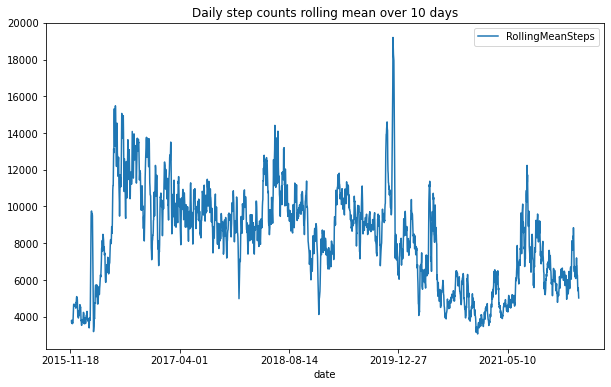

In [15]:
steps_by_date['RollingMeanSteps'] = steps_by_date.Steps.rolling(window=10, center=True).mean()
steps_by_date.plot(x='date', y='RollingMeanSteps', title= 'Daily step counts rolling mean over 10 days', figsize=[10, 6])

## Steps by Day of Week

In [16]:
steps_by_date['date'] = pd.to_datetime(steps_by_date['date'])
steps_by_date['dow'] = steps_by_date['date'].dt.weekday

Text(0.5, 0, 'Day of Week')

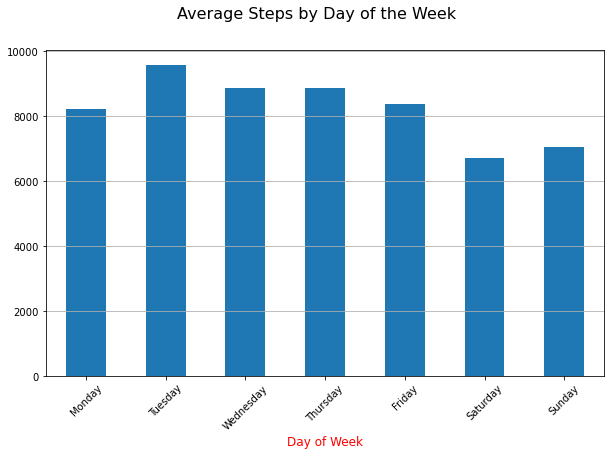

In [17]:
data = steps_by_date.groupby(['dow'])['Steps'].mean()

fig, ax = plt.subplots(figsize=[10, 6])
ax = data.plot(kind='bar', x='day_of_week')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.75

#fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)

plt.suptitle('Average Steps by Day of the Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.xlabel('Day of Week', fontsize=12, color='red')

------

## Monthly Steps

In [18]:
total_steps_by_month = steps.groupby(['month'])['value'].sum().reset_index(name='Steps')

In [19]:
total_steps_by_month

,month,Steps


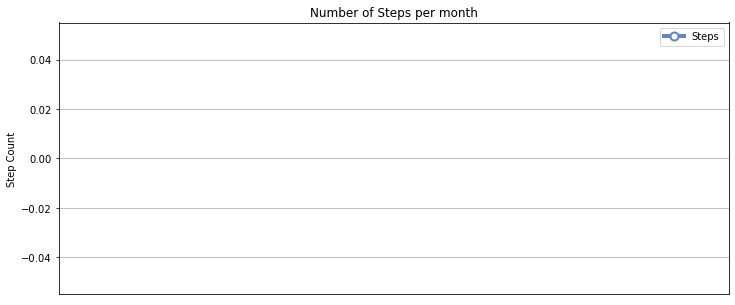

In [20]:
# a bit of a hackish solution, could use improvement
dataset = total_steps_by_month
chart_title = 'Number of Steps per month'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Step Count')
# ax.set_xlabel('')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

----

## Steps Per Year

In [21]:
total_steps_by_years = steps.groupby(['year'])['value'].sum().reset_index(name='Steps')

In [22]:
total_steps_by_years

,year,Steps


IndexError: tuple index out of range

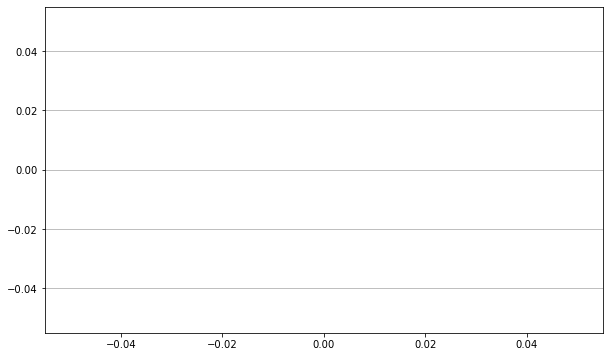

In [23]:
dataset = total_steps_by_years

n_groups = len(dataset)
opacity = 0.5
fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)
index = np.arange(n_groups)
bar_width = 0.4

data = plt.bar(index, dataset.Steps, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Steps')

data[-1].set_color('r')

plt.ylabel('Steps')
plt.title('Total Steps Per Year')
plt.xticks(index, dataset.year, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

-----

## Steps by Hour of Day

In [24]:
hour_steps = steps.groupby(['hour'])['value'].sum().reset_index(name='Steps')

In [25]:
# hour_steps

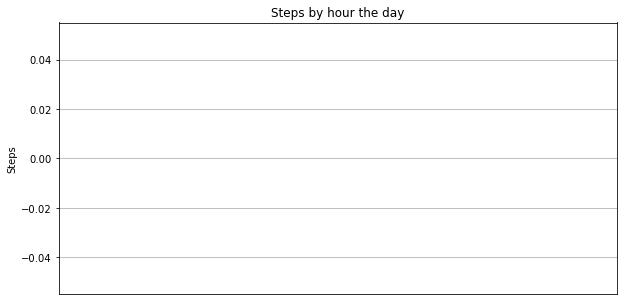

In [26]:
ax = hour_steps.Steps.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_steps.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

# ax.set_xlim((hour_steps.index[0], hour_steps.index[-1]))

ax.yaxis.grid(True)
# ax.set_ylim((0, 1300))
ax.set_ylabel('Steps')
ax.set_xlabel('')
ax.set_title('Steps by hour the day')

plt.show()

-----

In [ ]:
weight = pd.read_csv("data/apple_health_export/BodyMass.csv")

In [ ]:
# weight.columns

In [ ]:
# parse out date and time elements as Shanghai time
weight['startDate'] = pd.to_datetime(weight['startDate'])
weight['year'] = weight['startDate'].map(get_year)
weight['month'] = weight['startDate'].map(get_month)
weight['date'] = weight['startDate'].map(get_date)

In [ ]:
weight.tail()

In [ ]:
month_weight = weight.groupby(['month'])['value'].mean().reset_index(name='Weight')

In [ ]:
# month_weight

In [ ]:
# a bit of a hackish solution, could use improvement
dataset = month_weight
chart_title = 'Monthly Weight'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Weight (lbs)')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

In [ ]:
# convert to kg
month_weight['kg'] = round(month_weight['Weight'] / 2.205, 2)

In [ ]:
month_weight.columns

In [ ]:
# a bit of a hackish solution, could use improvement
dataset = month_weight[['month', 'kg']]
chart_title = 'Monthly Weight'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Weight (kg)')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

## Heart Rate

In [27]:
resting = pd.read_csv("data/apple_health_export/RestingHeartRate.csv")
len(resting)

1663

In [28]:
resting.columns

Index(['sourceName', 'sourceVersion', 'device', 'type', 'unit', 'creationDate',
       'startDate', 'endDate', 'value'],
      dtype='object')

In [29]:
resting.sourceName.unique()

array(['David’s Apple\xa0Watch', 'David’s Apple\xa0Watch3'], dtype=object)

In [30]:
# parse out date and time elements as Shanghai time
resting['startDate'] = pd.to_datetime(resting['startDate'])
resting['year'] = resting['startDate'].map(get_year)
resting['month'] = resting['startDate'].map(get_month)
resting['date'] = resting['startDate'].map(get_date)

In [31]:
# resting.tail(10)

<AxesSubplot:title={'center':'Resting HR'}, xlabel='date'>

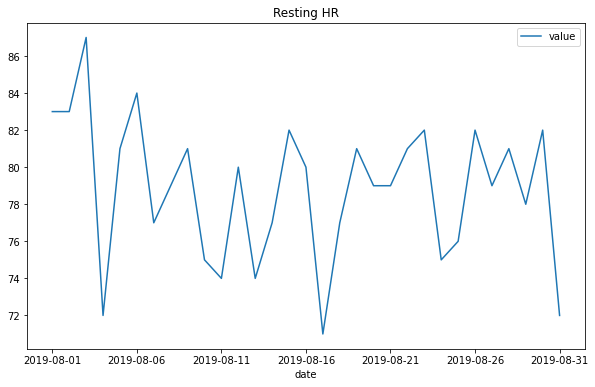

In [32]:
resting[resting.month == '2019-08'].plot(x='date', y='value', title= 'Resting HR', figsize=[10, 6])

In [33]:
hr = pd.read_csv("data/apple_health_export/HeartRate.csv")
len(hr)

372799

In [34]:
# hr.tail(10)

In [35]:
# parse out date and time elements as Shanghai time
hr['startDate'] = pd.to_datetime(hr['startDate'])
hr['year'] = hr['startDate'].map(get_year)
hr['month'] = hr['startDate'].map(get_month)
hr['hour'] = hr['startDate'].map(get_hour)
hr['date'] = hr['startDate'].map(get_date)

<AxesSubplot:title={'center':'HR'}, xlabel='startDate'>

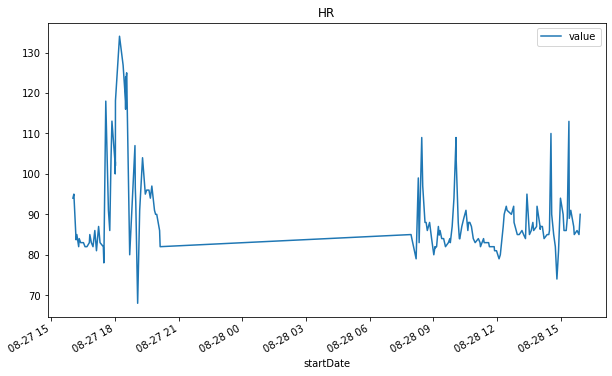

In [36]:
# plot a single day
test_date = '2019-08-28'
# len(hr[hr.date == test_date])
# TODO: Fix Axis for Hour of Day or Something Similar
hr[hr.date == test_date].plot(x='startDate', y='value', title= 'HR', figsize=[10, 6])

------

# Sleep

In [37]:
sleep_raw = pd.read_csv("data/apple_health_export/SleepAnalysis.csv")

In [38]:
sleep_raw.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
1083,David’s Apple Watch,8.4.2,NaN,SleepAnalysis,NaN,2022-04-03 08:47:23 -0400,2022-04-03 05:16:01 -0400,2022-04-03 06:10:01 -0400,HKCategoryValueSleepAnalysisAsleep
1084,David’s Apple Watch,8.4.2,NaN,SleepAnalysis,NaN,2022-04-03 08:47:23 -0400,2022-04-03 06:16:01 -0400,2022-04-03 07:13:01 -0400,HKCategoryValueSleepAnalysisAsleep
1085,David’s Apple Watch,8.4.2,NaN,SleepAnalysis,NaN,2022-04-03 08:47:23 -0400,2022-04-03 07:17:31 -0400,2022-04-03 07:55:31 -0400,HKCategoryValueSleepAnalysisAsleep
1086,David iPhone,15.3.1,NaN,SleepAnalysis,NaN,2022-04-03 08:47:22 -0400,2022-04-02 23:48:27 -0400,2022-04-03 08:01:22 -0400,HKCategoryValueSleepAnalysisInBed
1087,David iPhone,15.3.1,NaN,SleepAnalysis,NaN,2022-04-03 08:47:22 -0400,2022-04-03 08:19:03 -0400,2022-04-03 08:20:43 -0400,HKCategoryValueSleepAnalysisInBed


In [ ]:
# parse out date and time elements as Shanghai time
steps['startDate'] = pd.to_datetime(steps['startDate'])
steps['year'] = steps['startDate'].map(get_year)
steps['month'] = steps['startDate'].map(get_month)
steps['date'] = steps['startDate'].map(get_date)
steps['day'] = steps['startDate'].map(get_day)
steps['hour'] = steps['startDate'].map(get_hour)
steps['dow'] = steps['startDate'].map(get_day_of_week)